In [2]:
import requests
import pandas as pd
url = "https://api.spacexdata.com/v4/launches/past"
response = requests.get(url)
print("Status Code:", response.status_code)
data = response.json()
df_api = pd.json_normalize(data)
df_api.head()


Status Code: 200


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [3]:

df = df_api[[
    "flight_number",
    "date_utc",
    "rocket",
    "launchpad",
    "success"
]]
df = df.rename(columns={
    "date_utc": "Date",
    "rocket": "BoosterVersion",
    "launchpad": "LaunchSite",
    "success": "Outcome"
})
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Outcome"].fillna(False, inplace=True)
df["OutcomeBinary"] = df["Outcome"].apply(lambda x: 1 if x == True else 0)
df = df.drop_duplicates()
print("Cleaned Dataset Shape:", df.shape)
df.head()


Cleaned Dataset Shape: (187, 7)


/tmp/ipython-input-3811701605.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Outcome"].fillna(False, inplace=True)
/tmp/ipython-input-3811701605.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Outcome"].fillna(False, inplace=True)


,flight_number,Date,BoosterVersion,LaunchSite,Outcome,Year,OutcomeBinary
0,1,2006-03-24 22:30:00+00:00,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,2006,0
1,2,2007-03-21 01:10:00+00:00,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,2007,0
2,3,2008-08-03 03:34:00+00:00,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,2008,0
3,4,2008-09-28 23:15:00+00:00,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,True,2008,1
4,5,2009-07-13 03:35:00+00:00,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,True,2009,1


In [4]:
df.to_csv("spacex_cleaned.csv", index=False)
print("Saved cleaned dataset as spacex_cleaned.csv")


Saved cleaned dataset as spacex_cleaned.csv


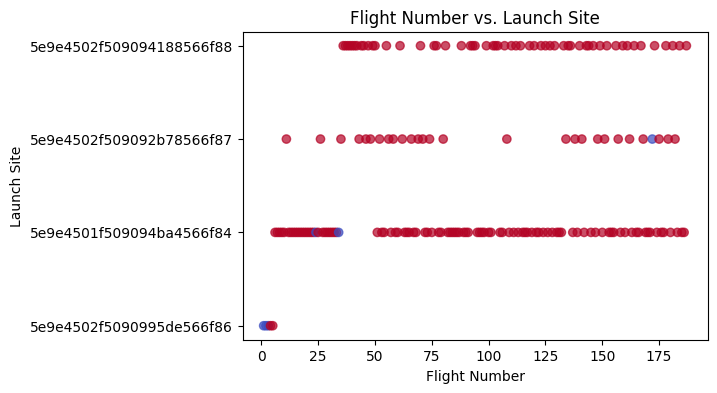

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(df["flight_number"], df["LaunchSite"], c=df["OutcomeBinary"], cmap="coolwarm", alpha=0.7)
plt.title("Flight Number vs. Launch Site")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.show()


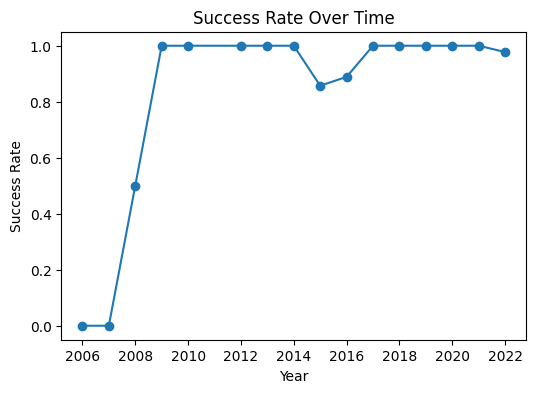

In [11]:
df.groupby("Year")["OutcomeBinary"].mean().plot(kind="line", marker="o", figsize=(6,4))
plt.title("Success Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.show()


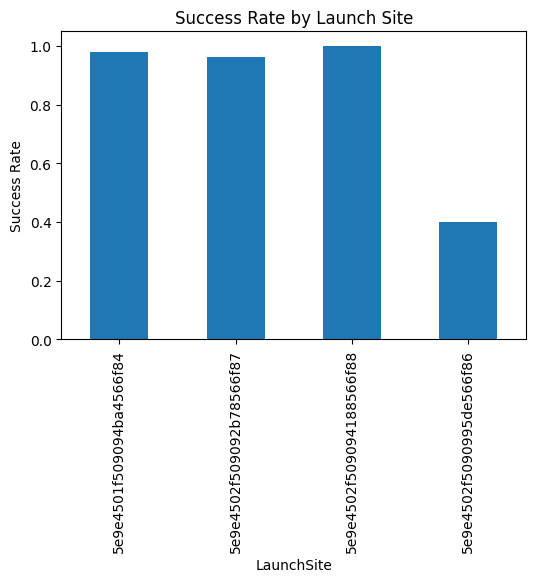

In [12]:
df.groupby("LaunchSite")["OutcomeBinary"].mean().plot(kind="bar", figsize=(6,4))
plt.title("Success Rate by Launch Site")
plt.ylabel("Success Rate")
plt.show()


In [14]:
import sqlite3

# Create SQLite database in memory
conn = sqlite3.connect(":memory:")

# Save DataFrame into SQL table
df.to_sql("spacex", conn, if_exists="replace", index=False)


187

In [15]:
query = "SELECT LaunchSite, COUNT(*) as TotalLaunches FROM spacex GROUP BY LaunchSite"
pd.read_sql(query, conn)


,LaunchSite,TotalLaunches
0,5e9e4501f509094ba4566f84,99
1,5e9e4502f509092b78566f87,28
2,5e9e4502f509094188566f88,55
3,5e9e4502f5090995de566f86,5


In [17]:
query = """
SELECT Year, AVG(OutcomeBinary)*100 as SuccessRate
FROM spacex
GROUP BY Year
ORDER BY SuccessRate DESC
LIMIT 1
"""
pd.read_sql(query, conn)


,Year,SuccessRate
0,2021,100.0


In [18]:
query = "SELECT BoosterVersion, AVG(OutcomeBinary)*100 as SuccessRate FROM spacex GROUP BY BoosterVersion"
pd.read_sql(query, conn)


,BoosterVersion,SuccessRate
0,5e9d0d95eda69955f709d1eb,40.000000
1,5e9d0d95eda69973a809d1ec,98.324022
2,5e9d0d95eda69974db09d1ed,100.000000


In [19]:
!pip install folium
import folium
import pandas as pd


In [20]:
# Base map (centered at Florida, where most SpaceX launches occur)
map_spacex = folium.Map(location=[28.563, -80.577], zoom_start=5)


In [21]:
# Example launch site dictionary
launch_sites = {
    "CCAFS SLC 40": [28.5618571, -80.577366],
    "KSC LC 39A": [28.573255, -80.646895],
    "VAFB SLC 4E": [34.632834, -120.610746]
}

# Add markers to the map
for site, coords in launch_sites.items():
    folium.Marker(
        location=coords,
        popup=site,
        icon=folium.Icon(color="blue", icon="rocket", prefix="fa")
    ).add_to(map_spacex)

map_spacex


In [22]:
# Example success rates per site
success_rate = {
    "CCAFS SLC 40": 0.75,
    "KSC LC 39A": 0.90,
    "VAFB SLC 4E": 0.60
}

for site, coords in launch_sites.items():
    folium.Circle(
        location=coords,
        radius=success_rate[site]*100000,  # circle size proportional to success rate
        color="green",
        fill=True,
        fill_opacity=0.4,
        popup=f"{site} Success Rate: {success_rate[site]*100:.1f}%"
    ).add_to(map_spacex)

map_spacex


In [23]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 82.0 MB/s eta 0:00:00


In [24]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd


In [25]:
df = pd.read_csv("spacex_cleaned.csv")


In [26]:
app = Dash(__name__)


In [27]:
app.layout = html.Div([
    html.H1("SpaceX Launch Dashboard", style={"textAlign": "center"}),

    # Dropdown for Launch Site
    dcc.Dropdown(
        id="site-dropdown",
        options=[{"label": site, "value": site} for site in df["LaunchSite"].unique()] +
                [{"label": "All Sites", "value": "ALL"}],
        value="ALL",
        placeholder="Select a Launch Site"
    ),

    # Pie Chart
    dcc.Graph(id="success-pie-chart"),

    # Payload Range Slider
    dcc.RangeSlider(
        id="payload-slider",
        min=0, max=20000, step=1000,
        marks={0: "0", 5000: "5000", 10000: "10000", 15000: "15000", 20000: "20000"},
        value=[0, 20000]
    ),

    # Scatter Chart
    dcc.Graph(id="success-payload-scatter")
])


In [28]:
# Callback for Pie Chart
@app.callback(
    Output("success-pie-chart", "figure"),
    Input("site-dropdown", "value")
)
def update_pie(selected_site):
    if selected_site == "ALL":
        fig = px.pie(df, names="LaunchSite", values="OutcomeBinary",
                     title="Total Success Launches by Site")
    else:
        filtered_df = df[df["LaunchSite"] == selected_site]
        fig = px.pie(filtered_df, names="OutcomeBinary",
                     title=f"Success vs Failure for {selected_site}")
    return fig

# Callback for Scatter Chart
@app.callback(
    Output("success-payload-scatter", "figure"),
    [Input("site-dropdown", "value"),
     Input("payload-slider", "value")]
)
def update_scatter(selected_site, payload_range):
    low, high = payload_range
    mask = (df["PayloadMass"] >= low) & (df["PayloadMass"] <= high)

    if selected_site == "ALL":
        filtered_df = df[mask]
    else:
        filtered_df = df[(df["LaunchSite"] == selected_site) & mask]

    fig = px.scatter(filtered_df, x="PayloadMass", y="OutcomeBinary",
                     color="BoosterVersion",
                     title="Payload vs. Outcome by Booster Version")
    return fig


In [30]:
if __name__ == "__main__":
    app.run(debug=True, port=8050)



<IPython.core.display.Javascript object>

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [35]:
df = pd.read_csv("spacex_cleaned.csv")

# Features (example: FlightNumber, PayloadMass, Year)
X = df[["flight_number", "Year"]]  # add PayloadMass if available
y = df["OutcomeBinary"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("SVM:\n", classification_report(y_test, y_pred_svm))





Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 0.9473684210526315
SVM Accuracy: 1.0
Logistic Regression:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Decision Tree:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.97        38

    accuracy                           0.95        38
   macro avg       0.50      0.47      0.49        38
weighted avg       1.00      0.95      0.97        38

SVM:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        38

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



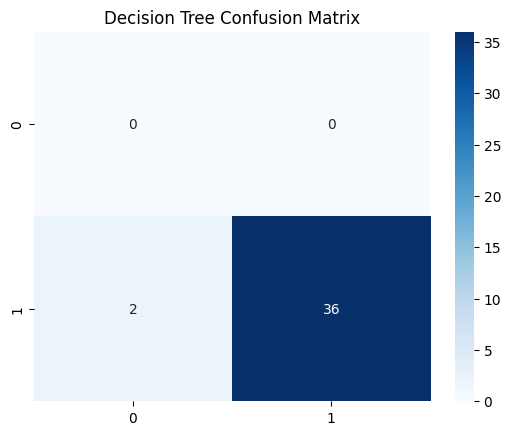

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()
